### install 开发环境
参考 [OpenCV-python](https://docs.opencv.org/4.8.0/d5/de5/tutorial_py_setup_in_windows.html)

1. vscode
>1. 从python profile template新建python profile
>2. install jupyter plugin
2. install python
>1. `winget install python3` 安装好后python自动加入到环境变量，重启terminal和vscode即可生效
>2. `pip3 install numpy matplotlib  opencv-contrib-python`

In [2]:
import cv2 as cv
print( cv.__version__)

4.8.1


## usage read/write imgage
OpenCV 以BGR模式加载图像，而 matplotlib以常见的RGB模式显示图像，需要转换。[转换参考](https://blog.csdn.net/qq_37274615/article/details/79893667)

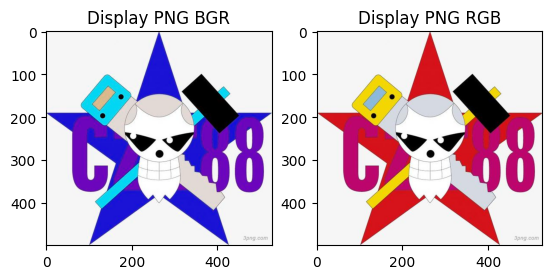

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("media/lenna.jpeg", flags=cv.IMWRITE_PNG_STRATEGY_FILTERED)
# cv.imshow("Display", img)
#k = cv.waitKey(0)
# if k == ord("q"):
    #exit()
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Display PNG BGR")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Display PNG RGB")
plt.show()


### video operate
保存的video格式
FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. The following codecs work fine for me.

In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
In Windows: DIVX (More to be tested and added)
In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).
FourCC code is passed as `cv.VideoWriter_fourcc('M','J','P','G')or cv.VideoWriter_fourcc(*'MJPG')` for MJPG.

In [12]:
import numpy as np
import cv2 as cv
# or read from a local file
# cap = cv.VideoCapture("media/video.mp4")
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'MJPG')
out = cv.VideoWriter('media/video.mp4', fourcc, 20.0, (640, 480))
if not cap.isOpened():
 print("Cannot open camera")
 exit()
while True:
 # Capture frame-by-frame
 ret, frame = cap.read()
 # if frame is read correctly ret is True
 if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
 out.write(frame)
 # Our operations on the frame come here
 gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 # Display the resulting frame
 cv.imshow('frame', gray)
 if cv.waitKey(1) == ord('q'):
    break
# When everything done, release the capture
cap.release()
out.release()
cv.destroyAllWindows()

### draw/mouse/tracker operate
OpenCV也可以绘制一些简单的图形，操作鼠标，绘制Color trackbar等等

## image core operation


[246 246 246]
246 246 246
246
100
(500, 527, 3)
790500


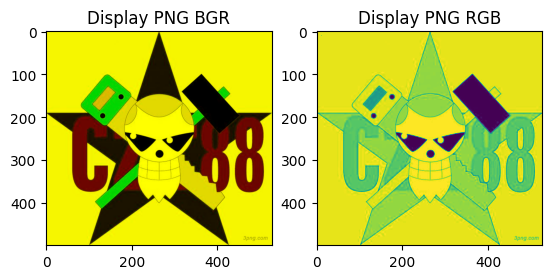

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('media/lenna.jpeg')
# BGR
px = img[100, 100]
print(px)
blue = img[100, 100, 0]
green = img[100, 100, 1]
red = img[100, 100, 2]
print(blue, green, red)

# Numpy is an optimized library for fast array calculations. 
# So simply accessing each and every pixel value and modifying 
# it will be very slow and it is discouraged.
#
# better pixel accessing
# accessing RED value
o_red = img.item(10, 10, 2)
# modifying RED value
print(o_red)
img.itemset((10, 10, 2), 100)
n_red = img.item(10, 10, 2)
print(n_red)

# tuple of number of rows, columns and channels (if the image is color)
# tuple of number of rows, columns (if the image is grayscale)
print(img.shape)
print(img.size)


# image ROI(region of interest)
# a small of region of interes of the original image
# instead of operating or searching the whole image, it imporves accuracy and performance
roi = img[0:0, 200:200]
# plt.imshow(roi)
# plt.show()

# image split is a costly operation
b,g,r = cv.split(img)
img2 = cv.merge((r,g,b))

img[:,:,2] = 0
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Display PNG BGR")
plt.subplot(1, 2, 2)
plt.imshow(img2[:,:,0])
plt.title("Display PNG RGB")
plt.show()


## Template matchings
查找template在原image找到匹配的位置，显然template宽高要不能超过原image

[参考:opencv](https://docs.opencv.org/4.8.0/d4/dc6/tutorial_py_template_matching.html)

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 在img上找到匹配template的区域，并画一个矩形
img = cv.imread('media/template_match_1.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('media/template_match_2.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    print('template.shape', template.shape)
    print('img.shape', img.shape)
    print(f'{min_val} {max_val} {min_loc} {max_loc}')
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 5)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## 频域添加水印
数字盲水印，通过往原图的频率域添加水印进行标识，在最终加上水印的图片中水印也不可感知。即使通过旋转、剪切、滤波等操作，都不可能消除这个隐形的水印。**截图截屏不能去除盲水印，只有手机拍摄才能去除盲水印**

原图经过傅里叶变换到频域后添加水印(经过了随机序列编码，也就是对原始水印各像素位置随机映射)，再傅里叶反变换生成最终的图片。
获取水印的方法：编码后的傅里叶变换减去编码前原图的傅里叶变换后的矩阵差值，再通过保存的随即编码映射表解出水印。

[参考](https://www.zhihu.com/question/50735753)


**示例是对灰度图像处理。若是要对彩色图像处理，需要分别对R,G,B进行如下的操作**


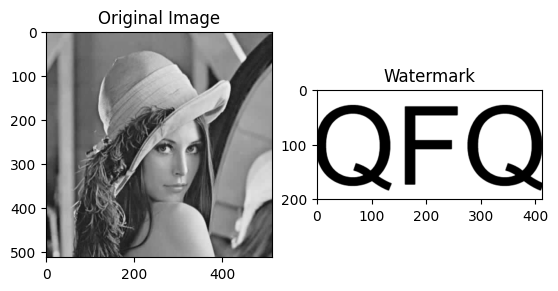

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
alpha = 0.5

# 读取数据
im = cv2.imread('media/lenna.jpeg', cv2.IMREAD_GRAYSCALE) / 255.0
mark = cv2.imread('media/watermark.png', cv2.IMREAD_GRAYSCALE) / 255.0

# 显示原始图像和水印
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(mark, cmap='gray')
plt.title('Watermark')
plt.show()

# 编码水印
imsize = im.shape
TH = np.zeros((imsize[0] , imsize[1]))
TH1 = TH.copy()
# 把水印贴到im大小的白板上
TH1[:mark.shape[0], :mark.shape[1]] = mark

# 生成随机排列的数组M，其长度为图像宽度
M = np.random.permutation(imsize[0])
# 生成随机排列的数组N，其长度为图像高度
N = np.random.permutation(imsize[1])

# 随机生成的密码表保存到文件
np.savez('encode.npz', M=M, N=N)

# 对贴了水印的白板背景图用随机码表进行编码
for i in range(imsize[0]):
    for j in range(imsize[1]):
        TH[i, j] = TH1[M[i], N[j]]

mark_encoded = np.zeros(imsize)
mark_encoded[:imsize[0] , :] = TH

随即编码后的水印打乱了结构，已经不可见

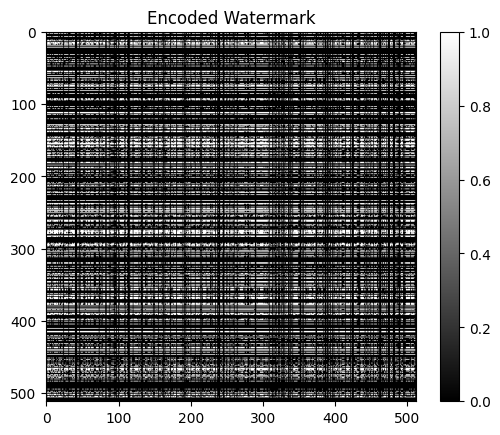

In [80]:
plt.figure()
plt.imshow(mark_encoded, cmap='gray')
plt.title('Encoded Watermark')
plt.colorbar()
plt.show()

- 原图通过`np.fft.fft2`进行傅里叶变换，
- 通过`np.fft.fftshift`将低频成分移动中心
- 添加编码后的水印到原图的频率域
- 结果傅里叶反变换后，再取abs，就获取到加了水印的图像

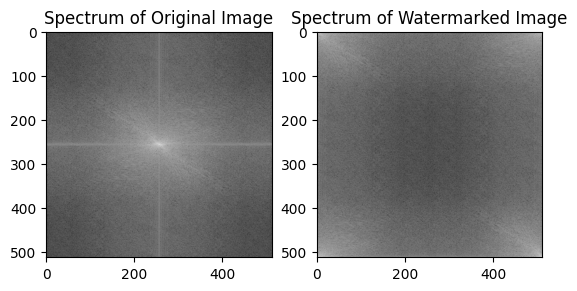

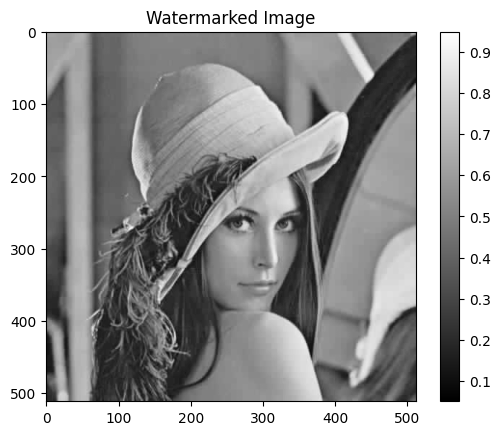

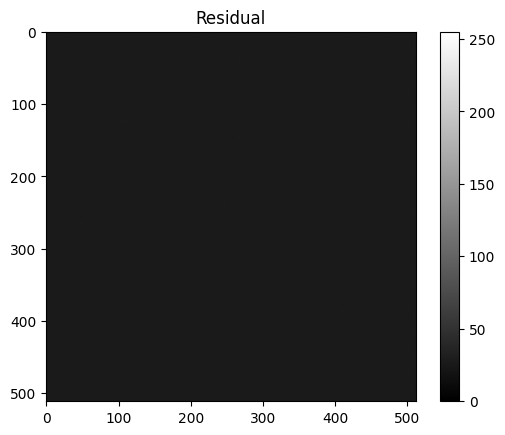

In [81]:

# 添加水印
# 对图像im进行二维傅里叶变换，得到其频域表示
FA = np.fft.fft2(im)
# 将频域表示的FA进行.fftshift操作，将低频成分移到中心
FA = np.fft.fftshift(FA)
# 计算并缩放傅里叶变换的幅度谱，以便更好地可视化
magnitude_spectrum = 20 * np.log(np.abs(FA))


FB = FA + alpha * mark_encoded
# 对FB进行傅里叶变换的中心化操作
# 中心化操作是为了将傅里叶变换的零频分量移动到变换结果的中心位置
# 这对于分析和处理信号的频率信息是非常有用的
FB_shift = np.fft.fftshift(FB)
magnitude_spectrum_watermarked = 20 * np.log(np.abs(FB_shift))

plt.subplot(121)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectrum of Original Image')

plt.subplot(122)
plt.imshow(magnitude_spectrum_watermarked, cmap='gray')
plt.title('Spectrum of Watermarked Image')
plt.show()

# 二维逆离散傅里叶变换
FAO = np.fft.ifft2(FB)
# 取变换结果的绝对值，得到实际的振幅信息
FAO = np.abs(FAO)

plt.figure()
plt.imshow(FAO, cmap='gray')
plt.title('Watermarked Image')
plt.colorbar()
plt.show()

RI = FAO - im
RI = (RI - RI.min()) / (RI.max() - RI.min())  # 归一化到 [0, 1]
RI = (RI * 255).astype(np.uint8)
plt.figure()
plt.imshow(RI, cmap='gray')
plt.title('Residual')
plt.colorbar()
plt.show()


提取水印
新图傅里叶变换到频域，再通过`np.fft.fftshit`移动低频到原点中心，减去原图的频域，通过随即编码表解码出水印

Text(0.5, 1.0, 'exracted watermark')

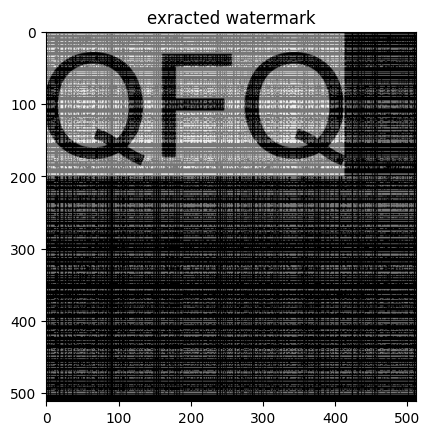

In [82]:
# extract watermark
FA2 = np.fft.fft2(FAO)
FA2 = np.fft.fftshift(FA2)
# 计算水印提取结果
G = (FA2 - FA) / alpha
# 初始化提取后的水印图像
G = np.abs(G)
GG = G.copy()

# 通过随机码表M，N解码出原始水印
for i in range(imsize[0]):
    for j in range(imsize[1]):
        GG[M[i], N[j]] = G[i, j]


# 显示提取的水印图像
plt.imshow(GG, cmap='gray')
plt.title('exracted watermark')


打了水印的图截断1/4能保留水印吗？

imsize: 128.0


Text(0.5, 1.0, 'exracted watermark')

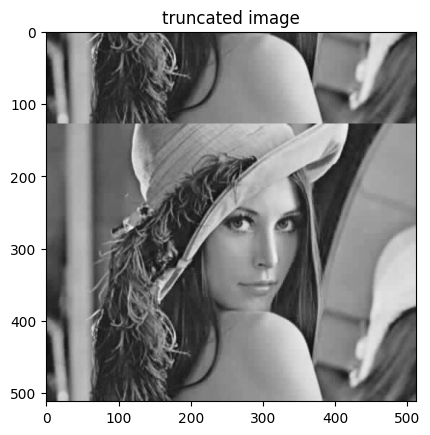

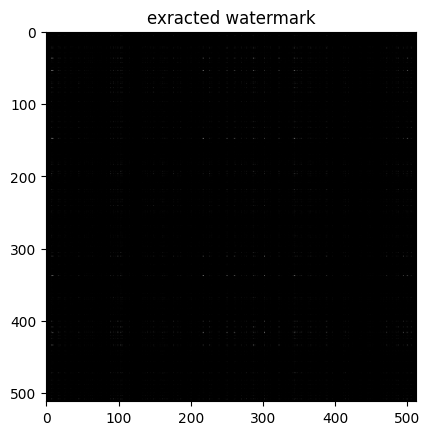

In [100]:
truncated_img = np.zeros((imsize[0], imsize[1]))
# 截取部分
truncated_img[int(imsize[0]/4):, :] = FAO[int(imsize[0]/4):, :]
# 再补全
truncated_img[0:int(imsize[0]/4), :] = FAO[int(imsize[0]/4 * 3):, :]
plt.figure()
plt.imshow(truncated_img, cmap='gray')
plt.title("truncated image")

tff = np.fft.fft2(truncated_img)
tff = np.fft.fftshift(tff)


# 计算水印提取结果
G = (tff - FA) / alpha
# 初始化提取后的水印图像
G = np.abs(G)
GG = G.copy()

# 通过随机码表M，N解码出原始水印
for i in range(imsize[0]):
    for j in range(imsize[1]):
        GG[M[i], N[j]] = G[i, j]


# 显示提取的水印图像
plt.figure()
plt.imshow(GG, cmap='gray')
plt.title('exracted watermark')